In [1]:
from google.colab import files
uploaded = files.upload()


Saving movie_recommendation_dataset.xlsx to movie_recommendation_dataset.xlsx


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  int64  
 1   item_id             100000 non-null  int64  
 2   movie               100000 non-null  object 
 3   rating              100000 non-null  float64
 4   timestamp           100000 non-null  int64  
 5   price               100000 non-null  float64
 6   popularity_score    100000 non-null  float64
 7   user_age            100000 non-null  float64
 8   session_duration    100000 non-null  float64
 9   previous_purchases  100000 non-null  int64  
 10  discount_applied    100000 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 8.4+ MB
None
   user_id  item_id                    movie  rating   timestamp  price  \
0    15796     1174     Shawshank Redemption     2.7  1667272584  35.45   
1      861     1928    

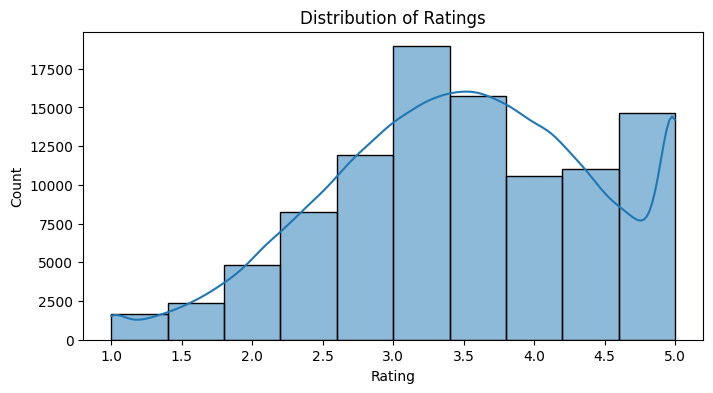

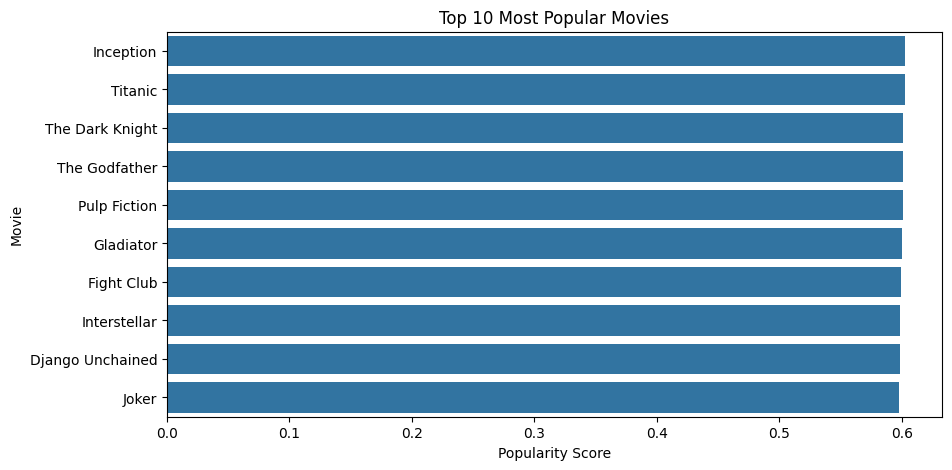

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("movie_recommendation_dataset.xlsx")

# Display basic info
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Distribution of ratings
plt.figure(figsize=(8, 4))
sns.histplot(df["rating"], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Top 10 Most Popular Movies
top_movies = df.groupby("movie")["popularity_score"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_movies.values, y=top_movies.index)
plt.title("Top 10 Most Popular Movies")
plt.xlabel("Popularity Score")
plt.ylabel("Movie")
plt.show()


In [3]:
# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Normalize popularity score
df["popularity_score"] = df["popularity_score"] / df["popularity_score"].max()

# Convert user_id and item_id to string
df["user_id"] = df["user_id"].astype(str)
df["item_id"] = df["item_id"].astype(str)

print("Preprocessing Complete!")


Preprocessing Complete!


In [4]:
!pip install scikit-surprise

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Define Reader format
reader = Reader(rating_scale=(1, 5))

# Load dataset for Surprise
data = Dataset.load_from_df(df[["user_id", "item_id", "rating"]], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train model
model = SVD()
model.fit(trainset)

# Evaluate model
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

# Function to get movie recommendations for a user
def recommend_movies(user_id, num_recommendations=5):
    unique_movies = df["item_id"].unique()
    movies_not_rated = [movie for movie in unique_movies if movie not in df[df["user_id"] == user_id]["item_id"].values]

    predictions = [model.predict(user_id, movie) for movie in movies_not_rated]
    predictions.sort(key=lambda x: x.est, reverse=True)

    recommended_movies = [df[df["item_id"] == pred.iid]["movie"].values[0] for pred in predictions[:num_recommendations]]
    return recommended_movies

# Example: Recommend movies for user '15796'
print("Recommended Movies:", recommend_movies("15796"))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505174 sha256=5b46d93e8f6f78dff51bc2020fd43528687e1720aaa6f3e3dcd80e1763fc331d
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
RMSE: 0.9626
RMSE: 0.9626032890249978
Recommended Movies: ['Shawshank Redemption', 'Django Unchained', 'Inception', 'The Prestige', 'Avengers: Endgame']
